# **FINAL PROJECT _ Optimization Methods for Data Science** 
### A.A. 2024-2025

**Pinos Gabriel** - 1965035  
**Federico Lattanzio** - 1886519

pinos.1965035@studenti.uniroma1.it  
lattanzio.1886519@studenti.uniroma1.it

In [1]:
# Import all the necessary modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
import matplotlib.pyplot as plt
filterwarnings('ignore')

## **Dataset overview**
--------
**Read all the 3 datasets and take a look to them**

The UTKFace-derived datasets contain features extracted via a ResNet backbone.
Each dataset includes:

- A number of columns labeled `feat_i`, which are the ResNet features.
- A final column `gt`, which is the ground truth label:
  - `AGE_PREDICTION.csv`: age values (float, from 0 to 100)
  - `GENDER_CLASSIFICATION.csv`: binary (0 = Female, 1 = Male)
  - `ETHNICITY_CLASSIFICATION.csv`: integer from 0 to 4 (5 ethnicity classes)

We will first explore the structure and content of the datasets to understand their dimensions and distributions.


In [6]:
age_df = pd.read_csv("dataset\AGE_PREDICTION.csv")
ethnicity_df = pd.read_csv("dataset\ETHNICITY_CLASSIFICATION.csv")
gender_df = pd.read_csv("dataset\GENDER_CLASSIFICATION.csv")

We begin by inspecting the first few rows and the label distribution of the `AGE_PREDICTION.csv` dataset.

First 10 entries in AGE_PREDICTION dataset:


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,gt
0,2.686191,-0.989465,-0.920503,1.607427,-0.896248,1.118974,-0.969456,1.811707,2.560955,3.803463,...,-0.862891,-0.909545,-0.915361,-0.952061,-0.989461,1.911855,1.409705,2.303997,-0.981840,54
1,-0.887917,4.915272,-0.939446,-0.343677,-0.964685,-0.478649,4.342395,-0.332870,-0.768041,-0.815375,...,-0.939201,-0.965917,-0.969461,-0.934799,5.304822,0.934790,-0.410701,0.284690,4.919212,18
2,-0.923215,2.746968,-0.918085,0.047804,-0.908587,-0.451752,2.984481,0.535007,-0.591029,-0.324043,...,-0.809726,-0.929934,-0.891814,-0.881796,3.415373,1.044108,-0.442615,0.033648,2.628199,26
3,-0.268866,-0.408416,-0.935145,0.731800,-0.922438,0.221781,-0.046606,1.149634,0.592136,1.357959,...,-0.834968,-0.937475,-0.917737,-0.929519,-0.226282,1.608048,0.276169,1.246468,-0.363367,33
4,0.529231,-0.829957,-0.897425,0.921280,-0.865304,0.331018,-0.644940,1.296097,1.166863,2.036034,...,-0.775411,-0.881967,-0.864018,-0.908001,-0.784495,1.329586,0.547925,1.195395,-0.810089,35
5,-0.793087,1.832985,-0.964968,0.274521,-0.962229,-0.288595,2.333454,0.788157,-0.311396,0.353214,...,-0.923235,-0.969646,-0.970492,-0.961975,2.462071,1.539259,-0.132857,0.922628,2.249941,29
6,-0.627914,0.537031,-0.846287,0.484149,-0.802970,-0.255616,1.103370,0.905729,0.121083,0.820827,...,-0.712115,-0.826480,-0.794454,-0.831328,1.042797,0.713609,-0.003151,0.097357,0.469993,13
7,-0.825429,3.686025,-0.979020,0.053158,-0.983342,-0.448615,3.839871,0.161758,-0.641629,-0.414449,...,-0.970626,-0.987172,-0.992049,-0.977634,4.310089,1.683480,-0.217012,1.010501,4.100075,28
8,1.978345,-0.941560,-0.906123,1.604776,-0.881297,0.819134,-0.879738,1.500830,1.694242,3.005683,...,-0.845833,-0.906470,-0.917842,-0.910915,-0.926480,1.689097,1.170266,1.745933,-0.939529,43
9,6.975595,-0.999944,-0.979416,5.483491,-0.976307,3.397312,-0.999714,2.934085,6.361970,9.293163,...,-0.980985,-0.976980,-0.982636,-0.989800,-0.999934,5.141039,4.198592,6.156951,-0.999915,54



 - Total samples: 20475
 -  Feature columns: 32 (excluding target 'gt')


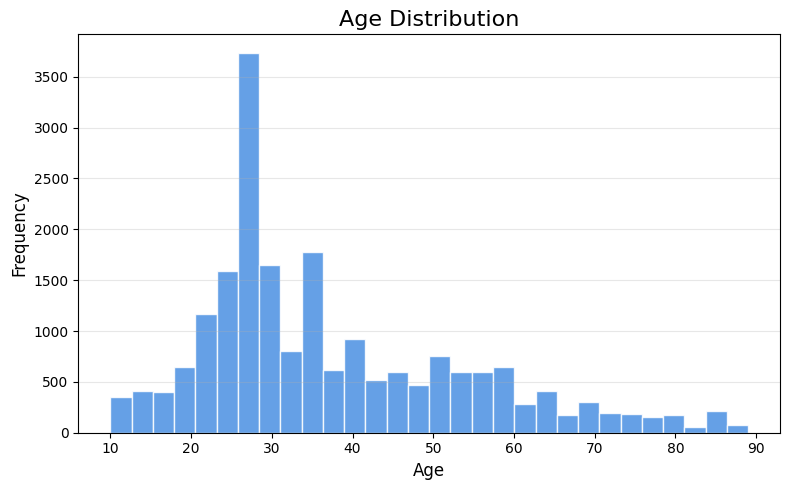

In [7]:
# Preview
print("First 10 entries in AGE_PREDICTION dataset:")
display(age_df.head(10))

# Dataset size
print(f"\n - Total samples: {len(age_df)}")
print(f" -  Feature columns: {age_df.shape[1] - 1} (excluding target 'gt')")

# Improved histogram plot
plt.figure(figsize=(8, 5))
plt.hist(age_df['gt'], bins=30, edgecolor='white', color='#4A90E2', alpha=0.85)
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


We now apply the same inspection to the `GENDER_CLASSIFICATION.csv`

First 10 entries in GENDER_CLASSIFICATION dataset:


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,gt
0,-0.900846,0.102587,-0.397814,0.112796,2.588096,-0.192754,-0.968311,-0.490886,-0.872099,-0.288411,...,2.541431,1.739102,0.166066,4.584869,-0.107031,-0.913990,-0.686416,-0.368085,-0.870545,0
1,-0.838868,0.039976,-0.387101,0.055413,2.066874,-0.226948,-0.947416,-0.472817,-0.855387,-0.207101,...,1.991721,1.259745,0.065058,3.019790,-0.110633,-0.890023,-0.611625,-0.298235,-0.855208,0
2,-0.814961,-0.010184,-0.397147,0.092713,1.897454,-0.269387,-0.945285,-0.449579,-0.849705,-0.151179,...,1.822978,1.105511,0.065353,2.500681,-0.052730,-0.885691,-0.583346,-0.218140,-0.856456,0
3,-0.110470,0.027849,-0.044310,-0.005343,0.177831,-0.232092,-0.562700,-0.400713,-0.552356,0.037349,...,-0.098367,-0.370318,-0.123008,-0.861314,0.106840,-0.483669,-0.224164,0.147321,-0.615051,0
4,-0.626313,-0.091985,-0.373756,-0.005083,1.172486,-0.314868,-0.885046,-0.412587,-0.818729,-0.012022,...,1.030348,0.421886,-0.068029,0.258984,-0.057158,-0.834079,-0.441066,-0.099874,-0.829539,0
5,-0.941448,0.165438,-0.392049,0.205172,3.134455,-0.161057,-0.982058,-0.499061,-0.884788,-0.341288,...,3.115495,2.232003,0.289214,6.179787,-0.052086,-0.932607,-0.753994,-0.415275,-0.885618,0
6,-0.624388,-0.080687,-0.366623,-0.049865,1.192401,-0.295711,-0.877278,-0.429471,-0.818519,-0.060946,...,1.045350,0.420301,-0.071344,0.328387,-0.099864,-0.831247,-0.436137,-0.157848,-0.824938,0
7,-0.360967,-0.055136,-0.222737,0.087353,0.521053,-0.297690,-0.790068,-0.485822,-0.745810,0.106832,...,0.249262,-0.195481,-0.132257,-0.800665,0.101134,-0.720496,-0.286264,0.140425,-0.767403,0
8,-0.313211,-0.053253,-0.220183,0.105120,0.460798,-0.311198,-0.772821,-0.473726,-0.724301,0.113229,...,0.173077,-0.230969,-0.142840,-0.830226,0.126386,-0.694164,-0.241437,0.184116,-0.760070,0
9,1.353326,-0.034194,0.277299,-0.471843,-0.809794,0.672951,2.717927,0.928540,1.897364,-0.233773,...,-0.782136,-0.502159,0.089402,-0.468237,-0.194680,2.013506,0.288960,-0.001121,1.840473,0



 - Total samples: 1000
 - Feature columns: 32 (excluding target 'gt')


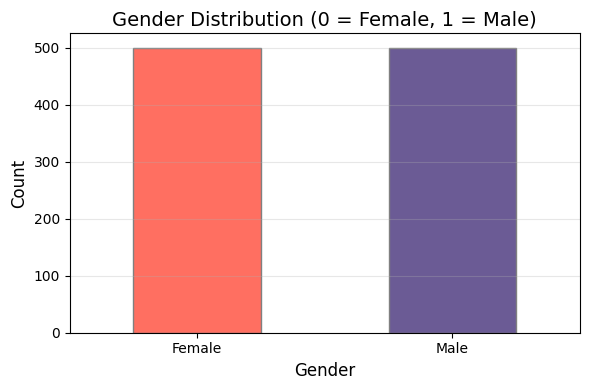

In [8]:
# Preview
print("First 10 entries in GENDER_CLASSIFICATION dataset:")
display(gender_df.head(10))

# Dataset size
print(f"\n - Total samples: {len(gender_df)}")
print(f" - Feature columns: {gender_df.shape[1] - 1} (excluding target 'gt')")

# Gender distribution
plt.figure(figsize=(6, 4))
gender_df['gt'].value_counts().sort_index().plot(kind='bar', color=['#FF6F61', '#6B5B95'], edgecolor='grey')
plt.title("Gender Distribution (0 = Female, 1 = Male)", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Female", "Male"], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

The same with the `ETHNICITY_CLASSIFICATION.csv`

This dataset contains an equal number of samples for each of the five ethnicity classes (0 to 4).

In [9]:
# Preview
print("\n First 10 entries in ETHNICITY_CLASSIFICATION dataset:")
display(ethnicity_df.head(10))

# Dataset size
print(f"\n - Total samples: {len(ethnicity_df)}")
print(f" - Feature columns: {ethnicity_df.shape[1] - 1} (excluding target 'gt')")

# Ethnicity distribution
ethnicity_counts = ethnicity_df['gt'].value_counts().sort_index()

print(" - Ethnicity class counts:")
for cls, count in ethnicity_counts.items():
    print(f"Class {cls}: {count} samples")


 First 10 entries in ETHNICITY_CLASSIFICATION dataset:


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,gt
0,0.502792,-0.349373,-0.068018,-0.627533,0.130331,0.373488,-0.491088,0.416753,-0.046255,0.325566,...,0.374539,-0.605601,0.579226,-0.119241,0.185425,-0.255194,0.705415,-0.027761,0.581276,0
1,0.741646,-0.240194,-0.006548,-0.639129,-0.059524,0.457087,-0.500733,0.345128,-0.040395,0.334946,...,0.353851,-0.651629,0.129014,-0.034723,0.392575,-0.289928,0.380891,-0.157109,0.742231,0
2,2.836617,1.256781,2.227900,-0.603728,0.200403,1.366685,-0.666864,1.156750,-0.004516,0.767839,...,0.265453,-0.762246,-0.331476,0.051758,1.255034,-0.529064,1.412283,1.182029,3.046791,0
3,2.576996,1.784919,3.166102,-0.539903,0.108954,1.773622,-0.708488,2.679638,-0.313469,1.817676,...,0.295006,-0.866968,2.203584,-0.428082,-0.368396,-0.398743,4.043780,2.281445,5.065996,0
4,1.614504,1.103544,0.755605,-0.561434,-0.551708,0.936586,-0.575693,0.533321,0.033991,0.980126,...,0.155448,-0.825574,-0.627675,0.060466,0.815617,-0.434781,0.040881,-0.152861,2.191638,0
5,1.380426,0.704440,2.137562,-0.474417,0.526263,1.211204,-0.586933,1.593458,-0.309388,1.175341,...,0.347852,-0.705405,2.125172,-0.377255,-0.388909,-0.391429,3.096098,1.798780,2.994499,0
6,-0.063048,0.793550,0.476156,-0.228052,-0.304069,0.463392,-0.484518,-0.123970,-0.026291,1.240902,...,0.193909,-0.694112,-0.053847,-0.142227,-0.351197,-0.415600,0.164695,-0.087266,1.136341,0
7,-0.290171,1.062530,0.259989,0.101906,-0.357112,0.186110,-0.381772,-0.578399,0.071056,1.057730,...,0.042993,-0.569325,-0.626185,0.004535,-0.108778,-0.465900,-0.600877,-0.369860,0.422504,0
8,1.500149,1.309460,1.346507,-0.536384,-0.527906,1.199974,-0.596429,1.376919,-0.109738,1.608356,...,0.140938,-0.869237,0.443240,-0.152118,-0.048564,-0.391414,1.410651,0.505609,3.215973,0
9,2.080621,1.218115,1.569579,-0.633604,-0.435140,1.291967,-0.647991,1.772735,-0.120592,1.372363,...,0.202256,-0.874066,0.589836,-0.158117,0.258229,-0.346515,1.820684,0.771601,3.551059,0



 - Total samples: 2500
 - Feature columns: 32 (excluding target 'gt')
 - Ethnicity class counts:
Class 0: 500 samples
Class 1: 500 samples
Class 2: 500 samples
Class 3: 500 samples
Class 4: 500 samples


## **Part 1: Multi-Layer-Perceptron for age regression**
------
In this part of the project, we aim to implement and train a **Multi-Layer Perceptron (MLP)** from scratch (without using deep learning libraries) to solve a **regression problem**: predicting a person's age based on deep features extracted from facial images in the UTKFace dataset.

### **Objective**

Given the dataset `AGE_PREDICTION.csv`, where each sample consists of a ResNet-extracted feature vector and an age label (`gt`), our goal is to:

- Build an MLP with **at least 2 hidden layers**.
- Minimize the **L2-regularized squared error loss**.
- Train the model using an optimizer like `scipy.optimize` (without autograd).
- Tune the hyperparameters via **k-fold cross-validation**.
- Evaluate the model on train, validation, and test sets using:
  - **Mean Squared Error (MSE)**
  - **Mean Absolute Percentage Error (MAPE)**

### **Something about Theory**

A Multi-Layer Perceptron is a feedforward neural network composed of layers of neurons. Each neuron performs a linear transformation followed by a non-linear activation. For this regression task, we define the loss function as:

$$
E(\omega, \beta) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 + \lambda \sum_{l=1}^{L} \|\omega^{(l)}\|_2^2
$$

Where:
- $y_i$ is the true age
- $\hat{y}_i$ is the predicted age
- $\omega^{(l)}$ is the weight matrix for layer $l$
- $\lambda$ is the regularization coefficient

The **regularization term** helps prevent overfitting by penalizing large weights.

**FIRST STEP**  
1. **Data Preparation**:
   - Load and inspect the dataset
   - Standardize the input features
   - Format inputs for training

In [10]:
# ➤ Separate features and target
X = age_df.drop(columns=['gt']).values     # Convert directly to NumPy array
y = age_df['gt'].values                    # Target as NumPy array

**Data Splitting and Scaling Strategy**

We reserve 20% of the dataset as a **hold-out test set** for final evaluation. The remaining 80% will be used for **k-fold cross-validation** to tune model hyperparameters.

This ensures that the final test error reflects the generalization ability of the model after hyperparameter tuning.


We must always fit the scaler (`fit_transform`) only on the training set, and apply the transformation (`transform`) to the test set.

This avoids using test set statistics (mean, std) during training — which would lead to overfitting and invalid results.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# First split the data
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, y, test_size=0.2, random_state=123)

# Now fit the scaler ONLY on the trainval set
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_ts = scaler.transform(X_ts)  # Use the same mean/std from training

# Print the shapes of the datasets
print(f'Number of samples in the training set: {X_tr.shape[0]}')
print(f'Number of samples in the test set: {X_ts.shape[0]}')

Number of samples in the training set: 16380
Number of samples in the test set: 4095


**Hyperparameter Configuration for Cross-Validation**

To identify the best model architecture and regularization strength, we define a set of candidate configurations.

Each configuration specifies:
- The number of layers and neurons per layer
- The activation function (`'tanh'` or `'sigmoid'`)
- The L2 regularization parameter λ

These configurations will be evaluated using **k-fold cross-validation**, and the one with the lowest average validation error (MAPE or MSE) will be selected.

In [12]:
input_dim = X_tr.shape[1]  # Number of input features

configs = [
    # 1 hidden layer, light regularization
    {"layers": [input_dim, 32, 1], "activation": "tanh", "lambda": 1e-4},
    
    # 2 hidden layers, moderate regularization
    {"layers": [input_dim, 64, 32, 1], "activation": "tanh", "lambda": 1e-3},
    
    # 3 hidden layers, sigmoid activation
    {"layers": [input_dim, 64, 64, 32, 1], "activation": "sigmoid", "lambda": 1e-4},
    
    # 2 hidden layers, larger network and stronger regularization
    {"layers": [input_dim, 128, 64, 1], "activation": "tanh", "lambda": 1e-2},
]

**Performing 5-Fold Cross-Validation**

We now evaluate each configuration using **5-fold cross-validation** on the training set.

For each configuration:
- The model is trained on 4 folds and validated on the remaining fold.
- This process repeats 5 times, each time using a different fold as the validation set.
- The validation performance is averaged across folds using **Mean Absolute Percentage Error (MAPE)** as the metric.

The configuration with the **lowest average MAPE** will be selected for final training and evaluation on the test set.


In [13]:
from src.Functions_1j_Pinos_Lattanzi import cross_validate_model

# Run k-fold CV and select the configuration with lowest avg MAPE
best_config, all_results = cross_validate_model(X_tr, Y_tr, k_folds=5, configs=configs, scoring='mape')

print("\n - Best Config Selected:", best_config)

Starting 5-fold cross-validation with 4 configurations...

Testing config 1/4: {'layers': [32, 32, 1], 'activation': 'tanh', 'lambda': 0.0001}
  Fold 1: MAPE = 96.4569, Train time = 0.29s, Converged = False
  Fold 2: MAPE = 96.4567, Train time = 0.24s, Converged = False
  Fold 3: MAPE = 95.4432, Train time = 0.27s, Converged = False
  Fold 4: MAPE = 96.4479, Train time = 0.25s, Converged = False
  Fold 5: MAPE = 95.9715, Train time = 0.24s, Converged = False
  Average MAPE: 96.1552 ± 0.4021, Avg time per fold: 0.26s

Testing config 2/4: {'layers': [32, 64, 32, 1], 'activation': 'tanh', 'lambda': 0.001}
  Fold 1: MAPE = 110.2185, Train time = 1.82s, Converged = False
  Fold 2: MAPE = 112.5835, Train time = 1.81s, Converged = False
  Fold 3: MAPE = 111.7996, Train time = 2.01s, Converged = False
  Fold 4: MAPE = 113.1717, Train time = 2.08s, Converged = False
  Fold 5: MAPE = 111.9268, Train time = 2.03s, Converged = False
  Average MAPE: 111.9400 ± 0.9914, Avg time per fold: 1.96s

Test

**Final Model Training on Full Training Set**

Using the best configuration selected via cross-validation, we now train the final MLP model on the **entire training set**.

This training is performed using the `scipy.optimize.minimize` function with the **L-BFGS-B optimizer**, which minimizes the L2-regularized MSE loss.

The optimization process returns:
- The trained model with optimal weights
- The optimizer result object (containing iterations, status, etc.)
- The total optimization time


In [14]:
from src.Functions_1j_Pinos_Lattanzi import train_model

y_min = Y_tr.min()
y_max = Y_tr.max()
Y_tr_norm = (Y_tr - y_min) / (y_max - y_min)

# ➤ Train final model on normalized targets
final_model, opt_result, train_time = train_model(
    X_tr, Y_tr_norm,
    layer_sizes=best_config['layers'],
    activation=best_config['activation'],
    lambda_reg=best_config['lambda']
)

# ➤ Predict and denormalize predictions
y_tr_pred = final_model.predict(X_tr) * (y_max - y_min) + y_min
y_ts_pred = final_model.predict(X_ts) * (y_max - y_min) + y_min


**Model Evaluation and Final Results**

After training the final MLP on the full training set, we evaluate its performance on both:
- The training set (to measure fit)
- The test set (to assess generalization)

We also print a summary of:
- The selected architecture and hyperparameters
- Performance metrics (MSE, MAPE)
- Optimizer details


In [15]:
# ─────────────────────────────────────────────────────────────
# Evaluate and print performance summary

# Compute performance metrics
mse_train = mean_squared_error(Y_tr, y_tr_pred)
mape_train = mean_absolute_percentage_error(Y_tr, y_tr_pred) * 100

mse_test = mean_squared_error(Y_ts, y_ts_pred)
mape_test = mean_absolute_percentage_error(Y_ts, y_ts_pred) * 100

# Print summary
print("\n--- FINAL MODEL PERFORMANCE ---")
print(f"Training MSE  : {mse_train:.4f}")
print(f"Training MAPE : {mape_train:.2f}%")
print(f"Test MSE      : {mse_test:.4f}")
print(f"Test MAPE     : {mape_test:.2f}%")



--- FINAL MODEL PERFORMANCE ---
Training MSE  : 128.3271
Training MAPE : 26.84%
Test MSE      : 130.2091
Test MAPE     : 27.72%


In [ ]:
# Your existing data loading and splitting code is good!
# ➤ Separate features and target
X = age_df.drop(columns=['gt']).values     # Convert directly to NumPy array
y = age_df['gt'].values                    # Target as NumPy array

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# First split the data
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, y, test_size=0.2, random_state=123)

# Now fit the scaler ONLY on the trainval set
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_ts = scaler.transform(X_ts)  # Use the same mean/std from training

# Print the shapes of the datasets
print(f'Number of samples in the training set: {X_tr.shape[0]}')
print(f'Number of samples in the test set: {X_ts.shape[0]}')

input_dim = X_tr.shape[1]  # Number of input features

# ============================================================================
# IMPROVED CONFIGURATIONS - More comprehensive and modern
# ============================================================================

configs = [
    # Original configurations (for comparison)
    {"layers": [input_dim, 32, 1], "activation": "tanh", "lambda": 1e-4},
    {"layers": [input_dim, 64, 32, 1], "activation": "tanh", "lambda": 1e-3},
    {"layers": [input_dim, 64, 64, 32, 1], "activation": "sigmoid", "lambda": 1e-4},
    {"layers": [input_dim, 128, 64, 1], "activation": "tanh", "lambda": 1e-2},
    
    # NEW: ReLU-based configurations (often work better for regression)
    {"layers": [input_dim, 64, 32, 1], "activation": "relu", "lambda": 1e-4},
    {"layers": [input_dim, 128, 64, 1], "activation": "relu", "lambda": 1e-3},
]

# Run cross-validation with more iterations for better convergence
from src.function2 import cross_validate_model

best_config, all_results = cross_validate_model(
    X_tr, Y_tr, 
    k_folds=5, 
    configs=configs, 
    max_iter=500,  # Increased iterations
    scoring='mape'
)

print("\n - Best Config Selected:", best_config)

# ============================================================================
# IMPROVED TRAINING WITH BETTER SETTINGS
# ============================================================================

from src.Functions_1j_Pinos_Lattanzi import train_model

# Target normalization (same as before)
y_min = Y_tr.min()
y_max = Y_tr.max()
Y_tr_norm = (Y_tr - y_min) / (y_max - y_min)

# ➤ Train final model with MORE iterations for final training
final_model, opt_result, train_time = train_model(
    X_tr, Y_tr_norm,
    layer_sizes=best_config['layers'],
    activation=best_config['activation'],
    lambda_reg=best_config['lambda'],
    dropout_rate=best_config.get('dropout', 0.0),  # Handle dropout if present
    max_iter=1000,  # More iterations for final model
    method='L-BFGS-B'  # You can also try 'BFGS' or 'CG'
)

print(f"\nTraining completed in {train_time:.2f} seconds")
print(f"Optimizer converged: {opt_result.success}")
print(f"Final loss: {opt_result.fun:.6f}")
print(f"Number of iterations: {opt_result.nit}")

# ➤ Predict and denormalize predictions
y_tr_pred = final_model.predict(X_tr) * (y_max - y_min) + y_min
y_ts_pred = final_model.predict(X_ts) * (y_max - y_min) + y_min

# ============================================================================
# EVALUATION WITH ADDITIONAL METRICS
# ============================================================================

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE with zero handling"""
    mask = np.abs(y_true) > 0.1  # Avoid division by very small numbers
    if np.sum(mask) == 0:
        return np.inf
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]))

# Compute comprehensive performance metrics
mse_train = mean_squared_error(Y_tr, y_tr_pred)
mae_train = mean_absolute_error(Y_tr, y_tr_pred)
mape_train = mean_absolute_percentage_error(Y_tr, y_tr_pred) * 100

mse_test = mean_squared_error(Y_ts, y_ts_pred)
mae_test = mean_absolute_error(Y_ts, y_ts_pred)
mape_test = mean_absolute_percentage_error(Y_ts, y_ts_pred) * 100

# Calculate R² score
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2_train = r2_score(Y_tr, y_tr_pred)
r2_test = r2_score(Y_ts, y_ts_pred)

# Print comprehensive summary
print("\n" + "="*50)
print("         FINAL MODEL PERFORMANCE")
print("="*50)
print(f"Training Set:")
print(f"  MSE   : {mse_train:.4f}")
print(f"  MAE   : {mae_train:.4f}")
print(f"  MAPE  : {mape_train:.2f}%")
print(f"  R²    : {r2_train:.4f}")
print(f"\nTest Set:")
print(f"  MSE   : {mse_test:.4f}")
print(f"  MAE   : {mae_test:.4f}")
print(f"  MAPE  : {mape_test:.2f}%")
print(f"  R²    : {r2_test:.4f}")

# Check for overfitting
print(f"\nOverfitting Analysis:")
print(f"  MSE Ratio (Test/Train): {mse_test/mse_train:.3f}")
print(f"  MAPE Difference: {mape_test - mape_train:.2f}%")

if mse_test/mse_train > 1.5:
    print("  ⚠️  Possible overfitting detected!")
elif mse_test/mse_train < 0.9:
    print("  ℹ️  Model might be underfitting")
else:
    print("  ✅ Good generalization!")

# ============================================================================
# OPTIONAL: PREDICTION ANALYSIS
# ============================================================================

# Analyze prediction errors
train_errors = Y_tr - y_tr_pred
test_errors = Y_ts - y_ts_pred

print(f"\nPrediction Error Analysis:")
print(f"Training errors - Mean: {np.mean(train_errors):.3f}, Std: {np.std(train_errors):.3f}")
print(f"Test errors     - Mean: {np.mean(test_errors):.3f}, Std: {np.std(test_errors):.3f}")

# Age range analysis
print(f"\nAge Range Analysis:")
print(f"Training age range: {Y_tr.min():.1f} - {Y_tr.max():.1f} years")
print(f"Test age range: {Y_ts.min():.1f} - {Y_ts.max():.1f} years")
print(f"Training pred range: {y_tr_pred.min():.1f} - {y_tr_pred.max():.1f} years")
print(f"Test pred range: {y_ts_pred.min():.1f} - {y_ts_pred.max():.1f} years")

Number of samples in the training set: 16380
Number of samples in the test set: 4095
Starting 5-fold cross-validation with 6 configurations...

Testing config 1/6: {'layers': [32, 32, 1], 'activation': 'tanh', 'lambda': 0.0001}
  Fold 1: MAPE = 96.4569, Train time = 0.26s, Converged = False
  Fold 2: MAPE = 96.4567, Train time = 0.23s, Converged = False
  Fold 3: MAPE = 95.4432, Train time = 0.22s, Converged = False
  Fold 4: MAPE = 96.4479, Train time = 0.20s, Converged = False
  Fold 5: MAPE = 95.9715, Train time = 0.22s, Converged = False
  Average MAPE: 96.1552 ± 0.4021, Avg time per fold: 0.23s

Testing config 2/6: {'layers': [32, 64, 32, 1], 'activation': 'tanh', 'lambda': 0.001}
  Fold 1: MAPE = 110.2185, Train time = 1.78s, Converged = False
  Fold 2: MAPE = 112.5835, Train time = 1.92s, Converged = False
  Fold 3: MAPE = 111.7996, Train time = 1.70s, Converged = False
  Fold 4: MAPE = 113.1717, Train time = 1.86s, Converged = False
  Fold 5: MAPE = 111.9268, Train time = 8.48s